In [126]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , GridSearchCV ,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,recall_score
from sympy import true

sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [127]:
df = pd.read_csv('/Users/rudxkush/Desktop/Daily Use/Kaggle Dataset/Titanic-Dataset.csv')

## EDA & Visualization
- Understand the Data : Get the idea of the dataset you're working on using df.info(), df.describe(), df.head().
- Handle Missing Values : Use df.isnull().sum() to detect them, then handle via median/mode imputation, dropping the row/column entirely, or ML-based imputation like KNNImputer in Feature Engg.
- Identify and Treat Outliers : Boxplot helps a lot in spotting them. Handle by removing completely, capping to a percentile range (Winsorizing), or applying log/sqrt transformations.
- Analyze Distributions : Study what distribution a feature follows by plotting sns.histplot(df['col'], kde=True). Look for normality, skewness, or multimodal shapes.
- Explore Relationships Between Variables : df.corr() + sns.heatmap() covers numerical relationships. For categorical understanding, use the hue parameter in seaborn plots. For categorical vs. numerical, try sns.boxplot(x='cat_col', y='num_col', data=df).

In [128]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [129]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [130]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [131]:
df.describe(include='object')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [132]:
# Missing data
df.isnull() # Returns a DataFrame of same shape with True where values are missing, else False

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [133]:
df.isnull().sum() # how many missing values per column

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

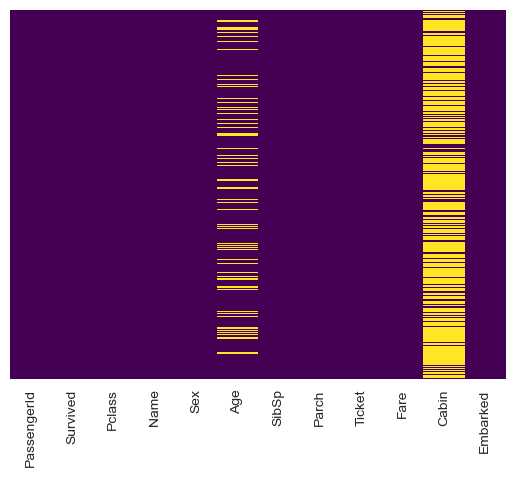

In [134]:
# Visualizing missing values in the dataset.
# Instead of manually checking each column, we use a heatmap
# to quickly identify which columns contain null values (NaN)
# and observe any patterns in missing data.
sns.heatmap(df.isnull(), yticklabels=False, cbar=False, cmap='viridis')
# Args : Condition, hides row index labels, hides the color bar, sets the color scheme
plt.show()

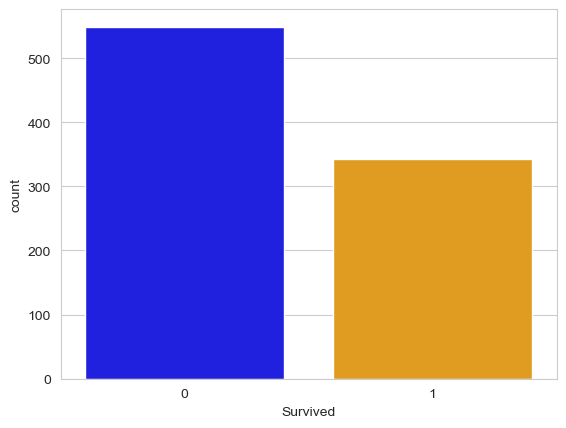

In [135]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', data=df, palette=['blue', 'orange'])
plt.show()

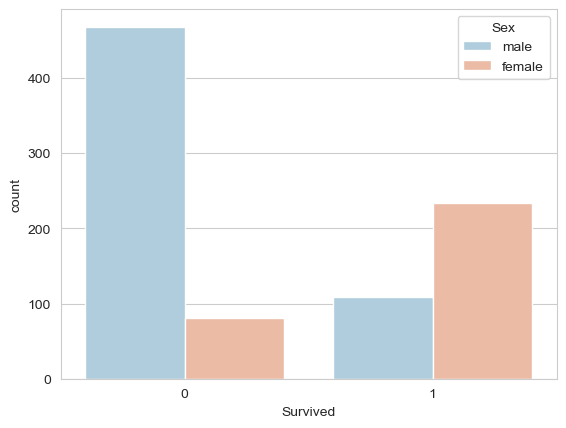

In [136]:
sns.set_style('whitegrid')
sns.countplot(x='Survived', hue="Sex", data=df, palette="RdBu_r")
plt.show()

In [137]:
df.select_dtypes(include='number').corr()  # Compute correlations only for numeric columns

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


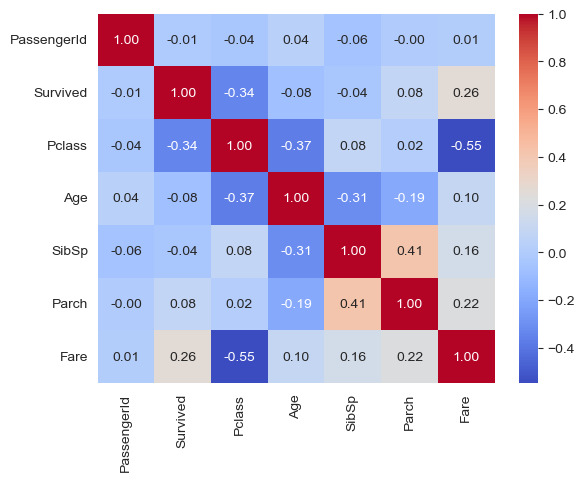

In [138]:
sns.heatmap(df.select_dtypes(include='number').corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.show();

## Preprocessing and Feature Selection

As age is an important factor in determining who made it out alive — children were likely prioritized in lifeboats, and young adults had a better fight-or-flight response — median imputation grouped by Pclass and Sex feels like the right approach.

In [139]:
df['Age'] = df.groupby(['Pclass', 'Sex'])['Age'].transform(
    lambda x: x.fillna(x.median())
)

In [140]:
df['Age'].isnull().sum() # verification

0

Drop Cabin column completely as 77% is missing and even the remaining 23% are messy. Values like C85, B28 etc. are not worth imputing.

In [141]:
df.drop(columns=['Cabin'], inplace=True)

As there are only 2 missing values in Embarked, and S (Southampton) is the most frequent port by far (~72% of passengers). We are going to use simply use S for the missing 2.

In [142]:
df['Embarked'].fillna('S', inplace=True)

Drop PassengerId, Name, Ticket as these identifiers have no predictive value and will confuse the model:

In [143]:
df.drop(columns=['PassengerId', 'Name', 'Ticket'], inplace=True)

Encoding categorical columns

In [144]:
df['Sex'] = df['Sex'].map({'male': 0, 'female': 1})
df = pd.get_dummies(df, columns=['Embarked'], drop_first=True)

Final Verification

In [145]:
df.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age           0
SibSp         0
Parch         0
Fare          0
Embarked_Q    0
Embarked_S    0
dtype: int64

Split the dataset into test, train, validate

In [146]:
X = df.drop(columns=['Survived']) # X as it is matrix
y = df['Survived'] # y as it is an array

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.20, random_state=42
)

## Train the model

In [147]:
# Baseline
lr = LogisticRegression()
lr.fit(X_train, y_train)
print("Logistic Regression:", lr.score(X_test, y_test))

# AdaBoost
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
print("AdaBoost:", ada.score(X_test, y_test))

Logistic Regression: 0.8100558659217877
AdaBoost: 0.7988826815642458
